<a href="https://colab.research.google.com/github/WillardSotL/Crypto-Tracker/blob/main/Crypto_Market_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
  url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
  resp = requests.get(url, params={
      'periods': '3600',
      'after': str(int(pd.Timestamp(after).timestamp()))
  })
  resp.raise_for_status()
  data = resp.json()
  df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
  df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
  df.set_index('CloseTime', inplace=True)
  return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-01-15 21:03:56.345674')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-15 22:00:00,43507.49,43551.70,43165.29,43341.15,53.069798,2.298755e+06
2022-01-15 23:00:00,43345.93,43425.93,43157.28,43276.07,14.635008,6.327117e+05
2022-01-16 00:00:00,43276.07,43398.99,43072.32,43102.01,26.956844,1.164944e+06
2022-01-16 01:00:00,43084.77,43131.55,43015.48,43097.41,20.956491,9.025992e+05
2022-01-16 02:00:00,43106.19,43184.52,43015.08,43033.17,8.367184,3.605614e+05


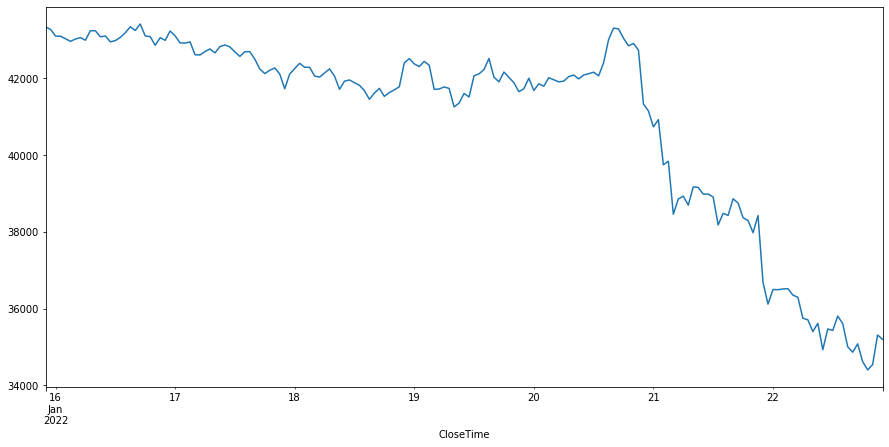

In [ ]:
btc['ClosePrice'].plot(figsize=(15,7))

**Ether:**

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-01-15 22:00:00,3354.06,3355.43,3329.34,3337.96,165.070179,5.518179e+05
2022-01-15 23:00:00,3337.70,3343.29,3331.12,3341.24,104.414032,3.485079e+05
2022-01-16 00:00:00,3338.98,3347.21,3327.03,3329.71,317.613649,1.059495e+06
2022-01-16 01:00:00,3328.95,3337.32,3317.42,3333.42,338.899769,1.127706e+06
2022-01-16 02:00:00,3334.36,3338.41,3323.00,3323.00,144.352937,4.807270e+05


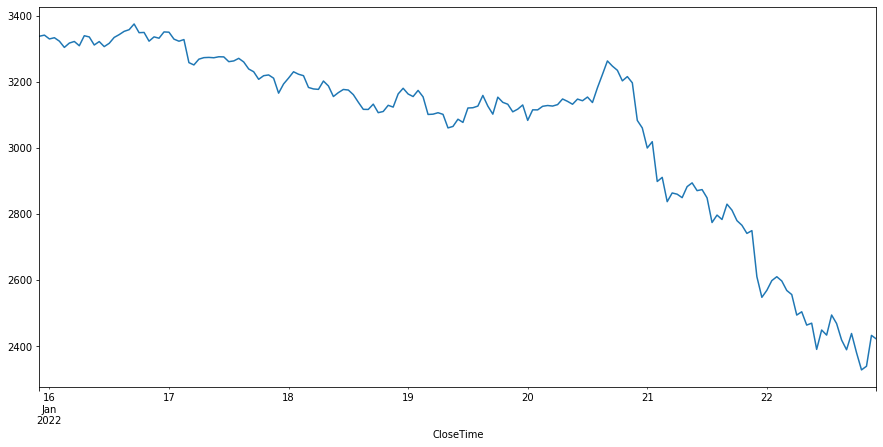

In [ ]:
eth['ClosePrice'].plot(figsize=(15,7))

**Dynamic plots with Bokeh**

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend="Bitcoin")
#p1.line(eth.index, eth['ClosePrice'], color='#f2a900', legend="Ether")

p1.legend.location = "top_left"

show(p1)

**Exporting to Excel**

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save()

# New Section